# <font color = red>Chapter 5. Linear Regression</font>

### One of the most practical techniques in data analysis is fitting a line through observed data points to show a relationship between two or more variables. A <font color=green>linear regression</font> fits a straight line to observed data, attempting to demonstrate a linear relationship between variables and make predictions on new data yet to be observed.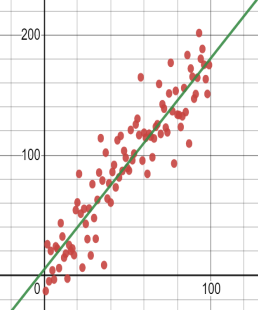
### <font color=green>Machine learning</font> has several techniques under its umbrella, but the one with the most use cases currently is  <font color=green>supervised learning</font>, and <font color=green>regressions</font> play a big role here.</br>While supervised learning is often regression, <font color=green>unsupervised machine learning</font> is more about clustering and anomaly detection. <font color=green>Reinforcement learning</font> often pairs supervised machine learning with simulation to rapidly generate synthetic data.

## <font color=red> Basic Linear Regression</font>
### I want to study the relationship between the age of a dog and the number of veterinary visits it had. In a fabricated sample we have 10 random dogs. 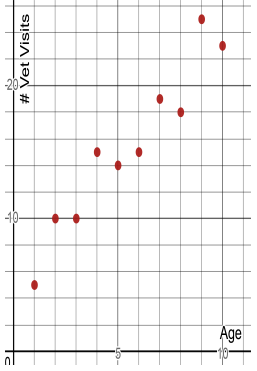
### We could draw a line through these points to show a correlation like this : <font color=green>Y = mX + b</font></br> 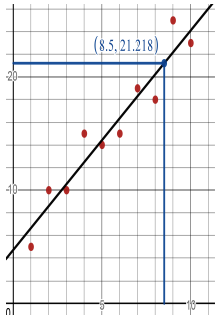

### It allows us to make predictions on data we have not seen before. I do not have a dog in my sample that is 8.5 years old, but I can look at this line and estimate the dog will have 21 veterinary visits in its life. I just look at the line where x = 8.5 and I see that y = 21.218. Another benefit is we can analyze variables for possible relationships and hypothesize that correlated variables are causal to one another.
### Now what are the downsides of a linear regression? I cannot expect that every outcome is going to fall exactly on that line. After all, real-world data is noisy and never perfect and will not follow a straight line. It may not remotely follow a straight line at all! There is going to be error around that line, where the point will fall above or below the line. </br>Another catch is we should not use the linear regression to make predictions outside the range of data we have, meaning we should not make predictions where x < 0 and x > 10 because we do not have data outside those values

(10, 1) [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
m =  [1.93939394]  , b =  [4.73333333]


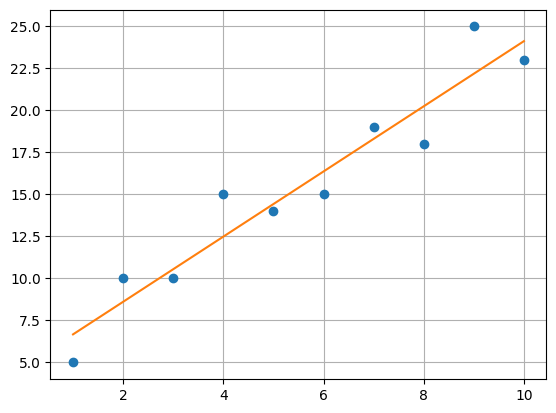

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# pip install scikit-learn
from sklearn.linear_model import LinearRegression
# scikit-learn is a free software machine learning library for the Python programming language.

df = pd.DataFrame({'X':[1,2,3,4,5,6,7,8,9,10], 'Y':[5,10,10,15,14,15,19,18,25,23]})
X = df['X'].values.reshape(-1,1); Y = df['Y'].values.reshape(-1,1)
print(X.shape,X) #the input shape for the lr should be in this format

fit = LinearRegression().fit(X, Y) # Fit a line to the points
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m = ",m," , b = ",b)

plt.plot(X, Y, 'o') # data points
plt.plot(X, m*X+b)  # linear regression line
plt.grid(True)

## <font color=red>Residuals and Squared Errors</font>
###  There is two questions that are fundamental to machine learning training:</br><font color=green>a. What defines a “best fit”?</font></br><font color=green>b. How do we get to that “best fit”?</font>
### a. The first question has a pretty established answer: we minimize the sum of the squared residual. The <font color=green>residual</font> is the numeric difference between the line and the points. Another name for residuals are <font color=green>errors</font>, because they reflect how wrong our line is in predicting the data.
### Points above the line will have a positive residual, and points below the line will have a negative residual. In other words, it is the subtracted difference between the predicted y-values (mX + b) and the actual y-values(real data set)

In [2]:
y_actual = df['Y']
y_predict = m*df['X'] + b
residual = y_actual - y_predict
print(residual)

0   -1.672727
1    1.387879
2   -0.551515
3    2.509091
4   -0.430303
5   -1.369697
6    0.690909
7   -2.248485
8    2.812121
9   -1.127273
dtype: float64


### We likely want to minimize these residuals in total so there is the least gap possible betweenthe line and points. But how do we measure the “total”? The best approach is to take the sum of squares, which simply squares each residual, or multiplies each residual by itself, and sums them. </br> 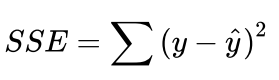

In [3]:
sum_of_squares = (residual ** 2).sum()
print(sum_of_squares)

28.096969696969712


## <font color=red>Finding the Best Fit Line</font>
### now we want to answer question b. Now how do we find the right m and b values that create the least sum of squares? there are five techniques you can use: <font color=green>closed form, matrix inversion, matrix decomposition, gradient descent, and stochastic gradient descent</font>. There are other search algorithms like <font color=green>hill climbing</font> that could be used but we dont use.


## <font color=green>Closed Form Equation</font>
###  this only works for a simple linear regression with one input variable. This luxury does not exist for many machine learning problems with several input variables and a large amount of data. The reason the closed form equations do not scale well with larger datasets is due to computational complexity. 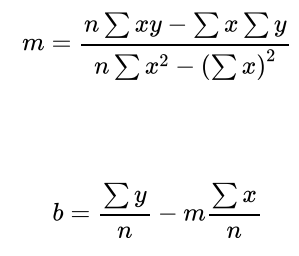

In [4]:
n = len(X)
m_cfe = (n*sum(X*Y) - sum(X)*sum(Y)) / (n*sum(X**2) - sum(X)**2)
b_cfe = (sum(Y) / n) - m_cfe * (sum(X) / n)
print(m_cfe, b_cfe)

[1.93939394] [4.73333333]


## <font color=green>Gradient Descent</font>
### Gradient descent is an optimization technique that uses derivatives and iterations to minimize/maximize a set of parameters against an objective. Gradient Descent is an iterative optimization algorithm that tries to find the optimum value (Minimum/Maximum) of an objective function. It is one of the most used optimization techniques in machine learning projects for updating the parameters of a model in order to minimize a cost function. 

### In gradient descent, The gradient is a vector that points in the direction of the steepest increase of the function at a specific point. Moving in the opposite direction of the gradient allows the algorithm to gradually descend towards lower values of the function, and eventually reaching to the minimum of the function.
### For the function f (x) = (x − 3) ^2 + 4, let’s find the x-value that produces the lowest point of that function. as you know, where the drivation slope is 0 means its flat and its a max or min point. </br> 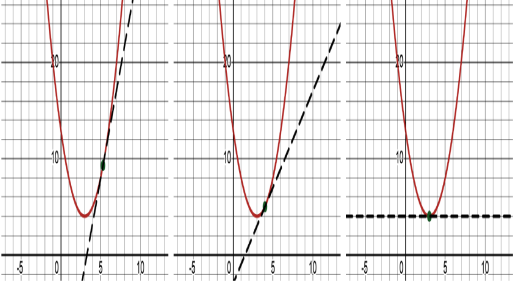

### <font color=blue>More about GD on https://blog.gopenai.com/understanding-of-gradient-descent-intuition-and-implementation-b1f98b3645ea.</font>

## <font color=red>Overfitting and Variance</font>
### if we truly wanted to minimize loss, as in reduce the sum of squares to 0, what would we do? One conclusion you may arrive at is simply fit a curve that touches all the points. That gives us a loss of 0!</br> This connect-the-dots model is severely <font color=green>overfit</font>, meaning it shaped the regression to the training data too exactly to the point it will predict poorly on new data. This simple connect-the-dots model is sensitive to outliers that are far away from the rest of the points, meaning it will have <font color=green>high variance</font> in predictions. While the points in this example are relatively close to a line, this problem will be a lot worse with other datasets with more spread and outliers. Because <font color=green>overfitting increases variance</font>, predictions are going to be not accurate! 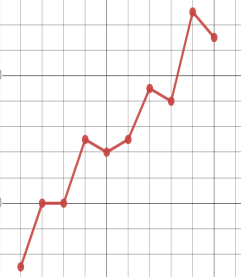
### <font color=green>OVERFITTING IS MEMORIZATION</font> : When you hear someone say a regression “memorized” the data rather than generalizing it, they are talking about overfitting. This is why in machine learning you will find bias is added to the model, and linear regression is considered a highly biased model. This is not the same as bias in the data.</br><font color=green>Bias in a model</font> means we prioritize a method (e.g., maintaining a straight line) as opposed to bending and fitting to exactly what the data says.
### adding much bias to a model counteracts overfitting with <font color=green>underfitting</font>, or fitting less to the training data.
### In machine learning, we basically are saying, “I want to fit a regression to my data, but I don’t want to fit it too much. I need some wiggle room for predictions on new data that will be different.”


## <font color=red>Stochastic Gradient Descent</font>
### <font color=blue>More about SGD on https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0.</font>

## <font color=red> The Correlation Coefficient</font>
### 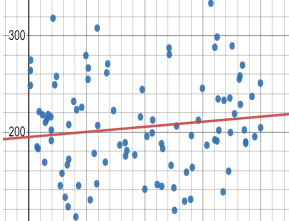
### The problem here is that the data has high variance. If the data is extremely spread out, it is going to drive up the variance to the point predictions become less accurate and useful, resulting in large residuals. We need to numerically measure how “off” our predictions are.
### <font color=green>correlation coefficient</font>, also called the <font color=green>Pearson correlation</font>, which measures the strength of the relationship between two variables as a value between –1 and 1. A correlation coefficient closer to <font color=green>0</font> indicates there is no correlation. A correlation coefficient closer to <font color=green>1</font> indicates a strong positive correlation, meaning when one variable increases, the other proportionally increases. If it is closer to <font color=green>–1</font> then it indicates a strong negative correlation, which means as one variable increases the other proportionally decreases. correlation coefficient is often denoted as <font color=green>r</font>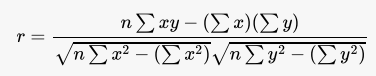</br></br>the plot above, has a correlation coefficient of 0.1201. Since it is much closer to 0 than 1, we can infer the data has little correlation. </br>If there is a strong positive or negative relationship, it will be useful in our linear regression. 

In [5]:
import pandas as pd
r = df.corr(method='pearson')
print(r)

          X         Y
X  1.000000  0.957586
Y  0.957586  1.000000


## <font color=red>Statistical Significance</font>

### Here is another aspect to a linear regression you must consider: is my data correlation coincidental?  is it possible I see a linear relationship in my data due to random chance? How can we be 95% sure the correlation between these two variables is <font color=green>significant</font> and not coincidental? We need to not just express the correlation coefficient but also quantify how confident we are that the correlation coefficient did not occur by chance.
### So we are going to extend <font color=green>hypothesis testing</font> and <font color=green>p-values</font> here with a linear regression.
### We denote the population correlation coefficient with the Greek symbol <font color=green>ρ</font> (Rho) while our sample correlation coefficient is <font color=green>r</font> . Just like what we did in hypothesis testing, we will have a <font color=green>null hypothesis H0</font> and <font color=green>alternative hypothesis H1</font> :</br> 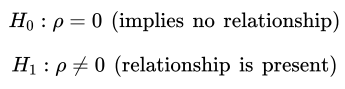
### Our <font color=green>null hypothesis H0</font> is that there is no relationship between two variables, or more technically, the <font color=green>correlation coefficient is 0</font>. The <font color=green>alternative hypothesis H1</font> is <font color=green>there is a relationship</font>, and it can be a positive or negative correlation. This is why the alternative hypothesis is defined as ρ ≠ 0 to support both a positive and negative correlation.

### Now lets talk about our example above. We already calculated the correlation coefficient is 0.957586. That’s a strong and compelling positive correlation.</br> But again, we need to evaluate if this was by random luck. Let’s pursue our hypothesis test with 95% confidence using a two-tailed test, exploring if there is a relationship between these two variables.
### We use a T-distribution because our samples are few.  there are 10 records in our sample and therefore we have 9 degrees of freedom (10 – 1 = 9). 
### <font color=green>Degrees of freedom</font>, often represented by <font color=green>v</font> or <font color=green>df</font>, is the number of independent pieces of information used to calculate a statistic. It's calculated as the sample size minus the number of restrictions.

In [6]:
from scipy.stats import t

n = 10; v=n-1
lower_cv = t(v).ppf(.025); upper_cv = t(v).ppf(.975)

print(lower_cv, upper_cv)

-2.262157162740992 2.2621571627409915


### If our test value happens to fall outside this range of (–2.262, 2.262), then we can reject our null hypothesis. To calculate the test value t, we need to use the following formula. Again <font color=green>r</font> is the correlation coefficient and <font color=green>n</font> is the sample size: </br> 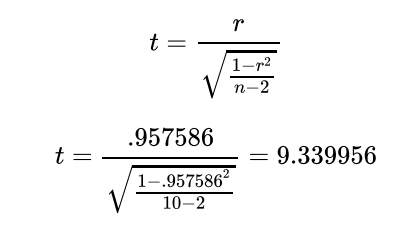
### The test value here is approximately 9.39956, which is definitely outside the range of (–2.262, 2.262) so we can reject the null hypothesis and say our correlation is real. That’s because the p-value is remarkably significant: .000005976. This is well below our .05 threshold, so this is virtually not coincidence: there is a correlation. It makes sense the p-value is so small because the points strongly resemble a line.

In [7]:
from math import sqrt

r = 0.957586
n=10

test_value = r / sqrt((1-r**2) / (n-2))
print("test value is : ", test_value)

if test_value > 0:
    p_value = 1.0 - t(n-1).cdf(test_value)
else:
    p_value = t(n-1).cdf(test_value)

p_value = p_value * 2 # Two-tailed, so multiply by 2
print("p value is : ", p_value)

test value is :  9.399564671312076
p value is :  5.9763860877914965e-06


## <font color=red> Coefficient of Determination</font>
### The <font color=green>coefficient of determination</font> , called <font color=green>r^2</font> , measures how much variation in one variable is explainable by the variation of the other variable. It is also the square of the correlation coefficient <font color=green>r</font>. As r approaches a perfect correlation (–1 or 1), r^2 approaches 1. Essentially, r^2 shows how much two variables interact with each other.
### A coefficient of determination of 0.916971 is interpreted as 91.6971% of the variation in x is explained by y (and vice versa), and the remaining 8.3029% is noise caused by other uncaptured variables; 0.916971 is a pretty good coefficient of determination, showing that x and y explain each other’s variance.

In [8]:
coeff_determination = df.corr(method='pearson') ** 2
print(coeff_determination)

          X         Y
X  1.000000  0.916971
Y  0.916971  1.000000


###  Just because we see a correlation between x and y <font color = red>DOES NOT</font> mean x causes y. It could actually be y causes x! Or maybe there is a third uncaptured variable z that is causing x and y. It could be that x and y do not cause each other at all and the correlation is just coincidental, hence why it is important we measure the statistical significance.

## <font color=red>Standard Error of the Estimate</font>
### One way to measure the overall error of a linear regression is the <font color=green>SSE</font>, or <font color=green>sum of squared error</font>. We learned about this earlier. If yˆ (pronounced “y-hat”) is each predicted value from the line and y represents each actual y-value from the data, here is the calculation: </br> 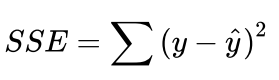
### We will also average all of them, and this is what the <font color=green>standard error of the estimate (Se) </font> does : </br> 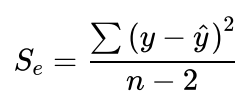
### Why n − 2 instead of n − 1? this is because a linear regression has two variables, not just one, so we have to increase the uncertainty by one more in our degrees of freedom. You will notice the standard error of the estimate looks remarkably similar to the standard deviation we studied in Chapter 3. This is not by accident. That is because it is the standard deviation for a linear regression.

In [9]:
y_actual = df['Y']
y_predict = m*df['X'] + b
residual = y_actual - y_predict
print(residual , '\n************')

sum_of_squares = (residual ** 2).sum()
print("sse is : ",sum_of_squares,'\n************')

n = 10
se = sum_of_squares / (n-2)
print("se is : ",se)

0   -1.672727
1    1.387879
2   -0.551515
3    2.509091
4   -0.430303
5   -1.369697
6    0.690909
7   -2.248485
8    2.812121
9   -1.127273
dtype: float64 
************
sse is :  28.096969696969712 
************
se is :  3.512121212121214


## <font color=red> Prediction Intervals</font>
### our data in a linear regression is a sample from a population. Therefore, our regression is only as good as our sample. Our linear regression line also has a normal distribution running along it. With a linear regression, we hope that data follows a normal distribution in a linear fashion, and the spread of the data around the line reflects the variance/standard deviation. There is a confidence interval around each y prediction, and this is known as a <font color=green>prediction interval</font> . for example A prediction interval for a dog that is 8.5 years old with 95% confidence is like this:  </br> 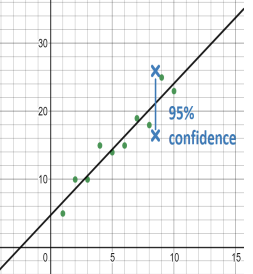


### It is calculated by this formula : </br> 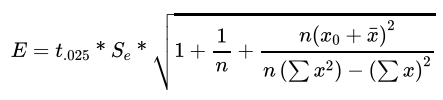

In [10]:
n = len(df["X"])
x_0 = 8.5
x_mean = df["X"].sum() / n
t_value = t(n - 2).ppf(.975)
se = 3.5121 #we calculated before

a1 = 1 ; a2 = 1/n; a3 = n*((x_0 + x_mean)**2)
a4 = n*(sum(df["X"]**2))  - sum(df["X"])**2 
E = t_value * se * sqrt(a1 + a2 + (a3/a4))

print("margin of intervals is : ",E)

# we calculated m = 1.939 , b = 4.733 before
m = 1.939;b = 4.733
predicted_y = m*x_0 + b
print("prediction intervals are between : [",predicted_y - E, " , ",predicted_y + E,"]") #Calculate prediction interval

margin of intervals is :  15.099121986094815
prediction intervals are between : [ 6.115378013905186  ,  36.313621986094816 ]


## <font color=red>Train/Test Splits</font>
### A basic technique machine learning practitioners use to mitigate overfitting is a practice called the <font color=green>train/test split</font> , where typically 1/3 of the data is set aside for testing and the other 2/3 is used for training. The training dataset is used to fit the linear regression, while the testing dataset is used to measure the linear regression’s performance on data it has not seen before. This technique is generally used for all supervised machine learning, including logistic regression and neural networks. </br>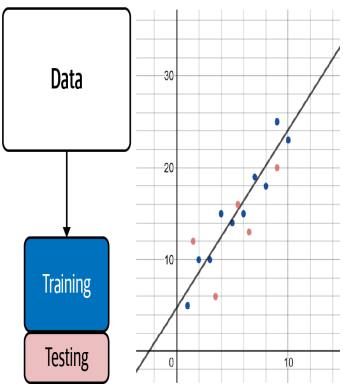

In [11]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = sns.load_dataset('mpg');df = df.dropna()
X = df['horsepower'].values.reshape(-1,1); Y = df['mpg'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

model = LinearRegression()
model.fit(X_train, Y_train)
R_SQUARE = model.score(X_test, Y_test) #evaluate the R-SQUARE (r^2)
print("R_SQUARE: %.3f" % R_SQUARE)

R_SQUARE: 0.617


### The higher the <font color=green>R_SQUARE</font> is for our testing dataset, the better. Having that higher number indicates the regression performs well on data it has not seen before. Note the R_SQUARE is calculated a little bit differently here as we have a predefined linear regression from training. </br> 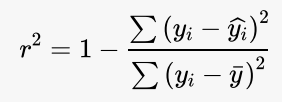 </br></br>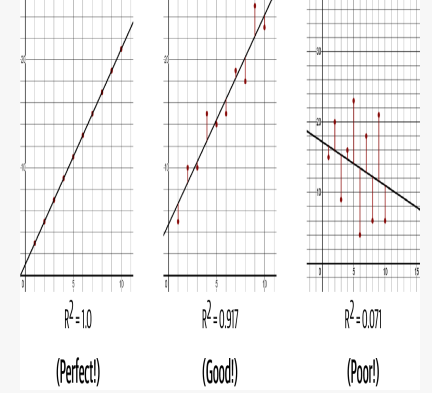

### We can also alternate the testing dataset across each 1/3 fold. This is known as <font color=green>cross-validation</font> and is often considered the gold standard of validation techniques. </br> 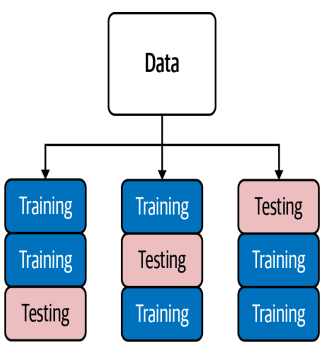

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

#kfold = KFold(n_splits=3) simply
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
R_SQUARE = cross_val_score(model, X, Y, cv=kfold)
print("R_SQUARES are : ",R_SQUARE)
print("R_SQUARE mean : ",R_SQUARE.mean())
print("R_SQUARE std : ",R_SQUARE.std())

R_SQUARES are :  [0.6727847  0.50490441 0.62054206]
R_SQUARE mean :  0.5994103886778746
R_SQUARE std :  0.07014678884302453


### When you get concerned about variance in your model, one thing you can do, rather than a simple train/test split or cross-validation, is use <font color=green>randomfold validation</font> to repeatedly shuffle and train/test split your data an unlimited number of times and aggregate the testing results.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit

kfold = ShuffleSplit(n_splits=10, test_size=.33, random_state=7)
model = LinearRegression()
R_SQUARE = cross_val_score(model, X, Y, cv=kfold)
print("R_SQUARES are : ",R_SQUARE)
print("R_SQUARE mean : ",R_SQUARE.mean())
print("R_SQUARE std : ",R_SQUARE.std())

R_SQUARES are :  [0.6737411  0.6136025  0.56995423 0.57690498 0.57164332 0.64620285
 0.55876859 0.5970748  0.60597944 0.59232399]
R_SQUARE mean :  0.6006195801292259
R_SQUARE std :  0.034346952772797985


## <font color=red> Multiple Linear Regression</font>
### simply linear regression with two or more input variables and one output variable.
### the example below is shit but it shows how its done!

In [14]:
from sklearn.linear_model import LinearRegression

X = df[['horsepower','weight']]; Y = df['mpg']
fit = LinearRegression().fit(X, Y)

print("Coefficients = ",fit.coef_)
print("Intercept = ",fit.intercept_)
print("z = {0} + {1}x + {2}y".format(fit.intercept_, fit.coef_[0],fit.coef_[0]))

Coefficients =  [-0.04730286 -0.00579416]
Intercept =  45.640210840177126
z = 45.640210840177126 + -0.04730286308619176x + -0.04730286308619176y
